In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Data Train (1).csv to Data Train (1).csv


In [ ]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [ ]:
df = pd.read_csv('/content/Data Train (1).csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
df.head()
#churn = dependent

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


# 1. Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

#### a. Missing Value

In [ ]:
df.isna().sum()
# Data bersih tidak memiliki null
# Data tidak memerlukan langkah fillna

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

#### b. Duplicated Value

In [ ]:
df.duplicated().sum()
# data bersih tanpa duplicate

0

# 2. Data Pre-Processing


### Kategorisasi Data
(categorical or numerical)

**Categorical**


1.   state
2.   area_code
3. international_plan
4. voice_mail_plan
5. churn

**Numerical**


1.   account_length
2.   number_vmail_messages
3. total_day_minutes
4. total_day_calls
5. total_day_charge
6. total_eve_minutes
8. total_eve_calls
9. total_eve_charge
10. total_night_minutes
11. total_night_calls
12. total_night_charge
13. total_intl_minutes
14. total_intl_calls
15. total_intl_charge
16. number_customer_service_calls







In [ ]:
categorical_col = ['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']
numeric_col = ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
               'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
               'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes',
               'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']

In [ ]:
df.nunique().sort_values()

churn                               2
international_plan                  2
voice_mail_plan                     2
area_code                           3
number_customer_service_calls      10
total_intl_calls                   21
number_vmail_messages              46
state                              51
total_day_calls                   120
total_eve_calls                   123
total_night_calls                 128
total_intl_minutes                168
total_intl_charge                 168
account_length                    215
total_night_charge                992
total_eve_charge                 1572
total_night_minutes              1757
total_eve_minutes                1773
total_day_charge                 1843
total_day_minutes                1843
dtype: int64

#### 1. Cek Outliers

array([[<Axes: title={'center': 'account_length'}>,
        <Axes: title={'center': 'number_vmail_messages'}>,
        <Axes: title={'center': 'total_day_minutes'}>,
        <Axes: title={'center': 'total_day_calls'}>],
       [<Axes: title={'center': 'total_day_charge'}>,
        <Axes: title={'center': 'total_eve_minutes'}>,
        <Axes: title={'center': 'total_eve_calls'}>,
        <Axes: title={'center': 'total_eve_charge'}>],
       [<Axes: title={'center': 'total_night_minutes'}>,
        <Axes: title={'center': 'total_night_calls'}>,
        <Axes: title={'center': 'total_night_charge'}>,
        <Axes: title={'center': 'total_intl_minutes'}>],
       [<Axes: title={'center': 'total_intl_calls'}>,
        <Axes: title={'center': 'total_intl_charge'}>,
        <Axes: title={'center': 'number_customer_service_calls'}>,
        <Axes: >]], dtype=object)

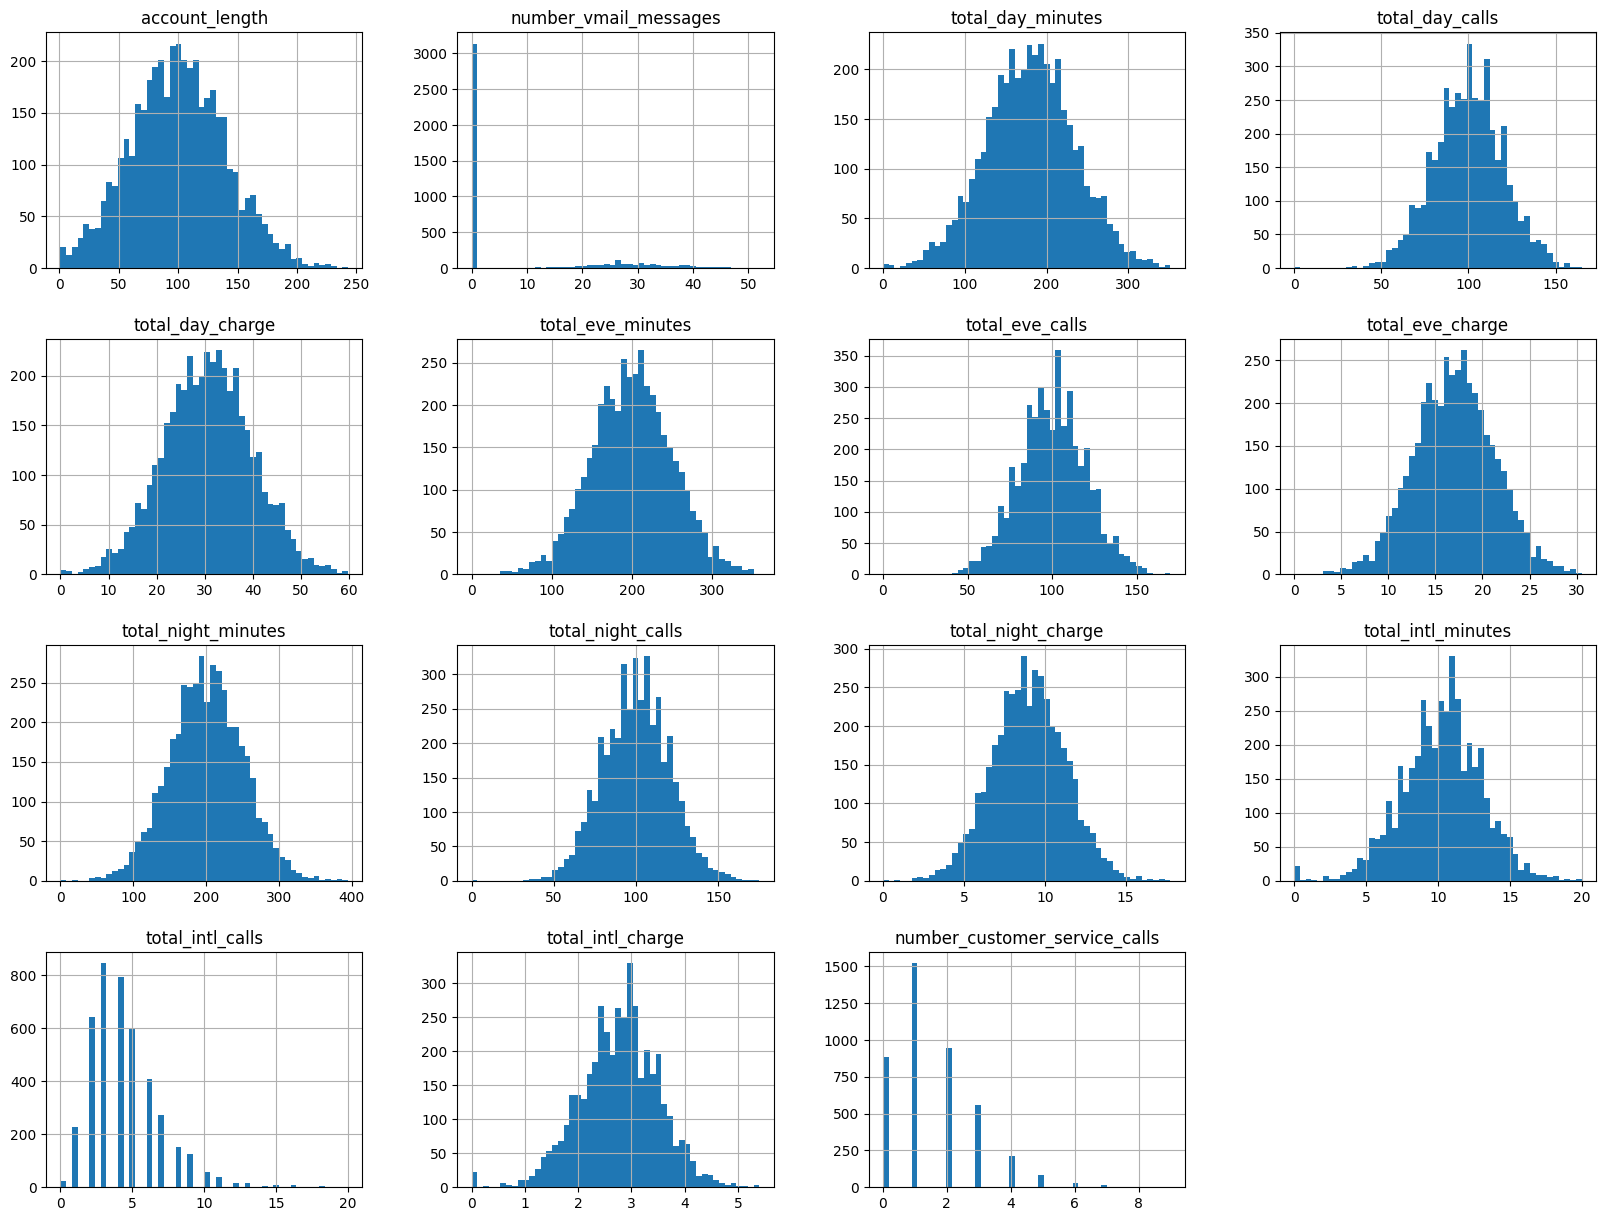

In [ ]:
df[numeric_col].hist(bins=50, figsize=(20,15))

semua terdistribusi normal kecuali `total_intl_calls`, `number_customer_service_calls`, dan `number_vmail_messages`

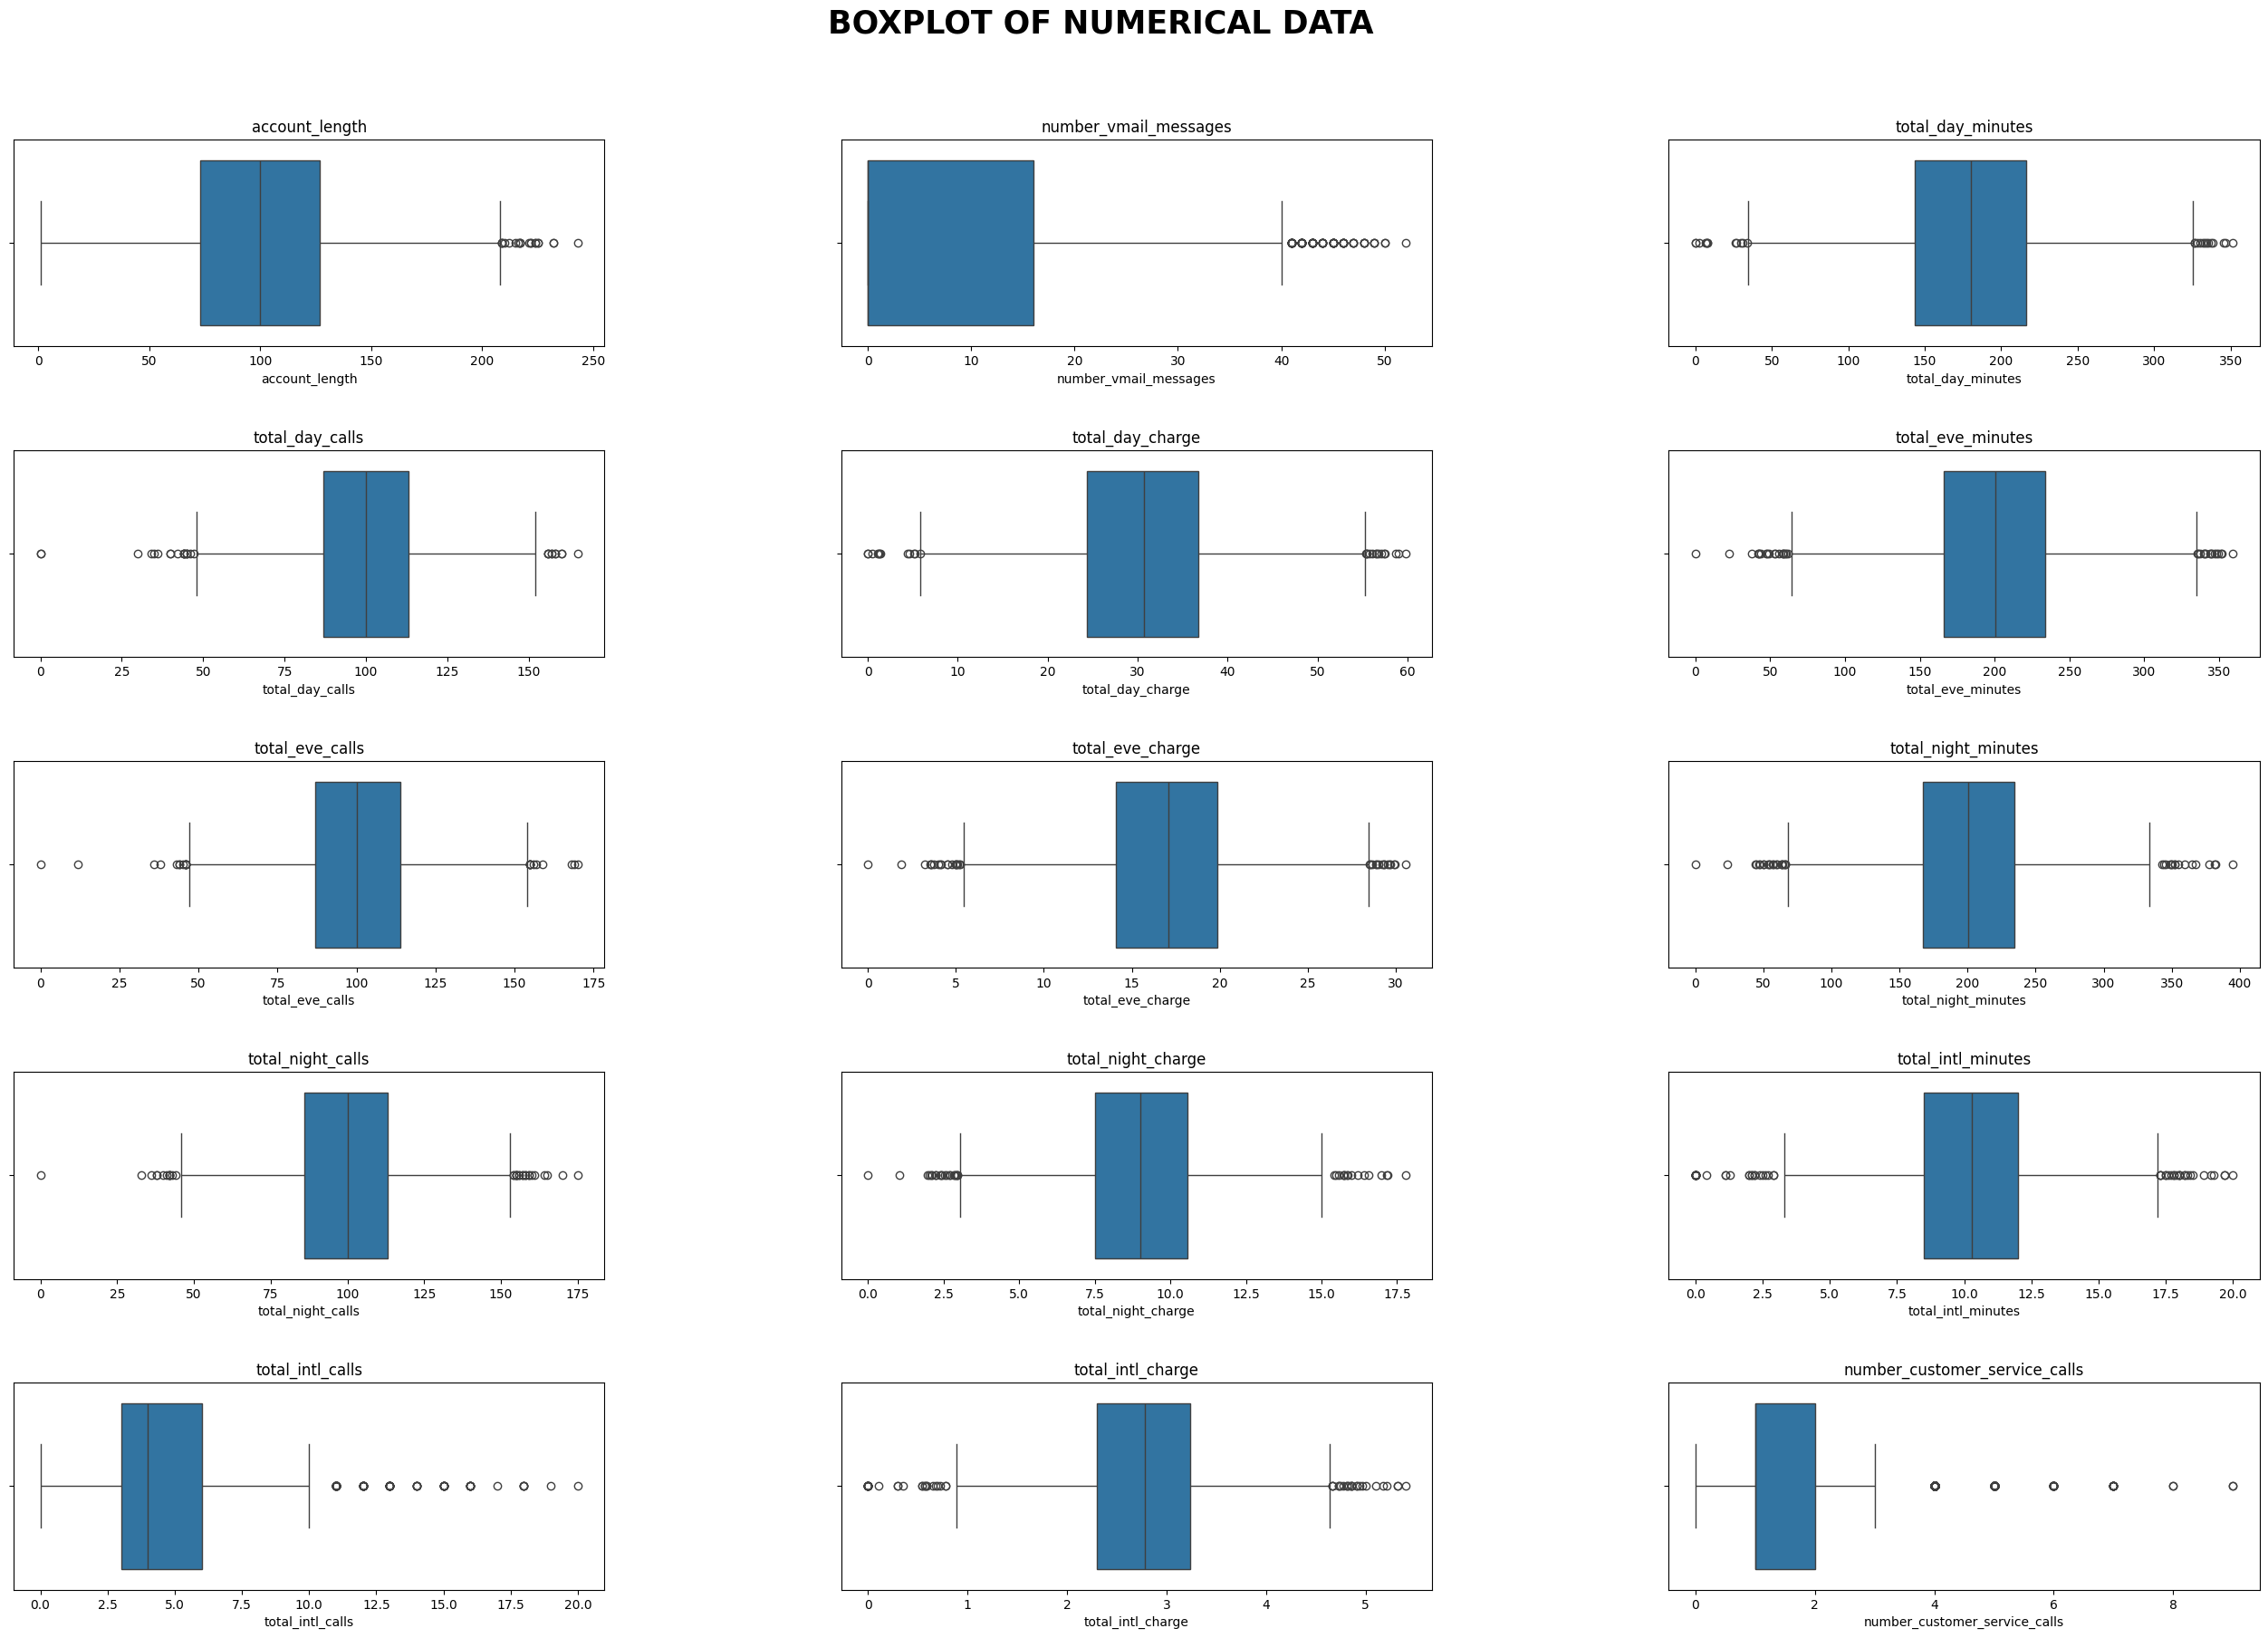

In [ ]:
#Boxplot untuk mengindentifikasi outliers
fig = plt.figure(figsize=[32,24])
fig.suptitle('BOXPLOT OF NUMERICAL DATA', fontsize=25, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,column in enumerate(numeric_col):
    ax1 = fig.add_subplot(6,3, i+1);
    ax1 = sns.boxplot(data = df, x=column);

    ax1.set_title(f'{column}')
    ax1.set_xlabel(f'{column}')

In [ ]:
#Penangan jika numerical data terdapat Outliers menggunakan IQR
# Dan menggunakan capping (mengubah nilai outliers dengan nilai upper / lower limit)
dict = {}
for col in numeric_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR  = Q3 - Q1
    upper_limit = Q1 + 1.5 * IQR
    lower_limit = Q3 - 1.5 * IQR
    dict['upper_limit' + col] = upper_limit
    dict['lower_limit' + col] = lower_limit
for col in numeric_col:
    df[col] = np.where(
        df[col] > dict['upper_limit' + col],
        dict['upper_limit' + col],
        np.where(
            df[col] < dict['lower_limit' + col],
            dict['lower_limit' + col],
            df[col]
        )
    )

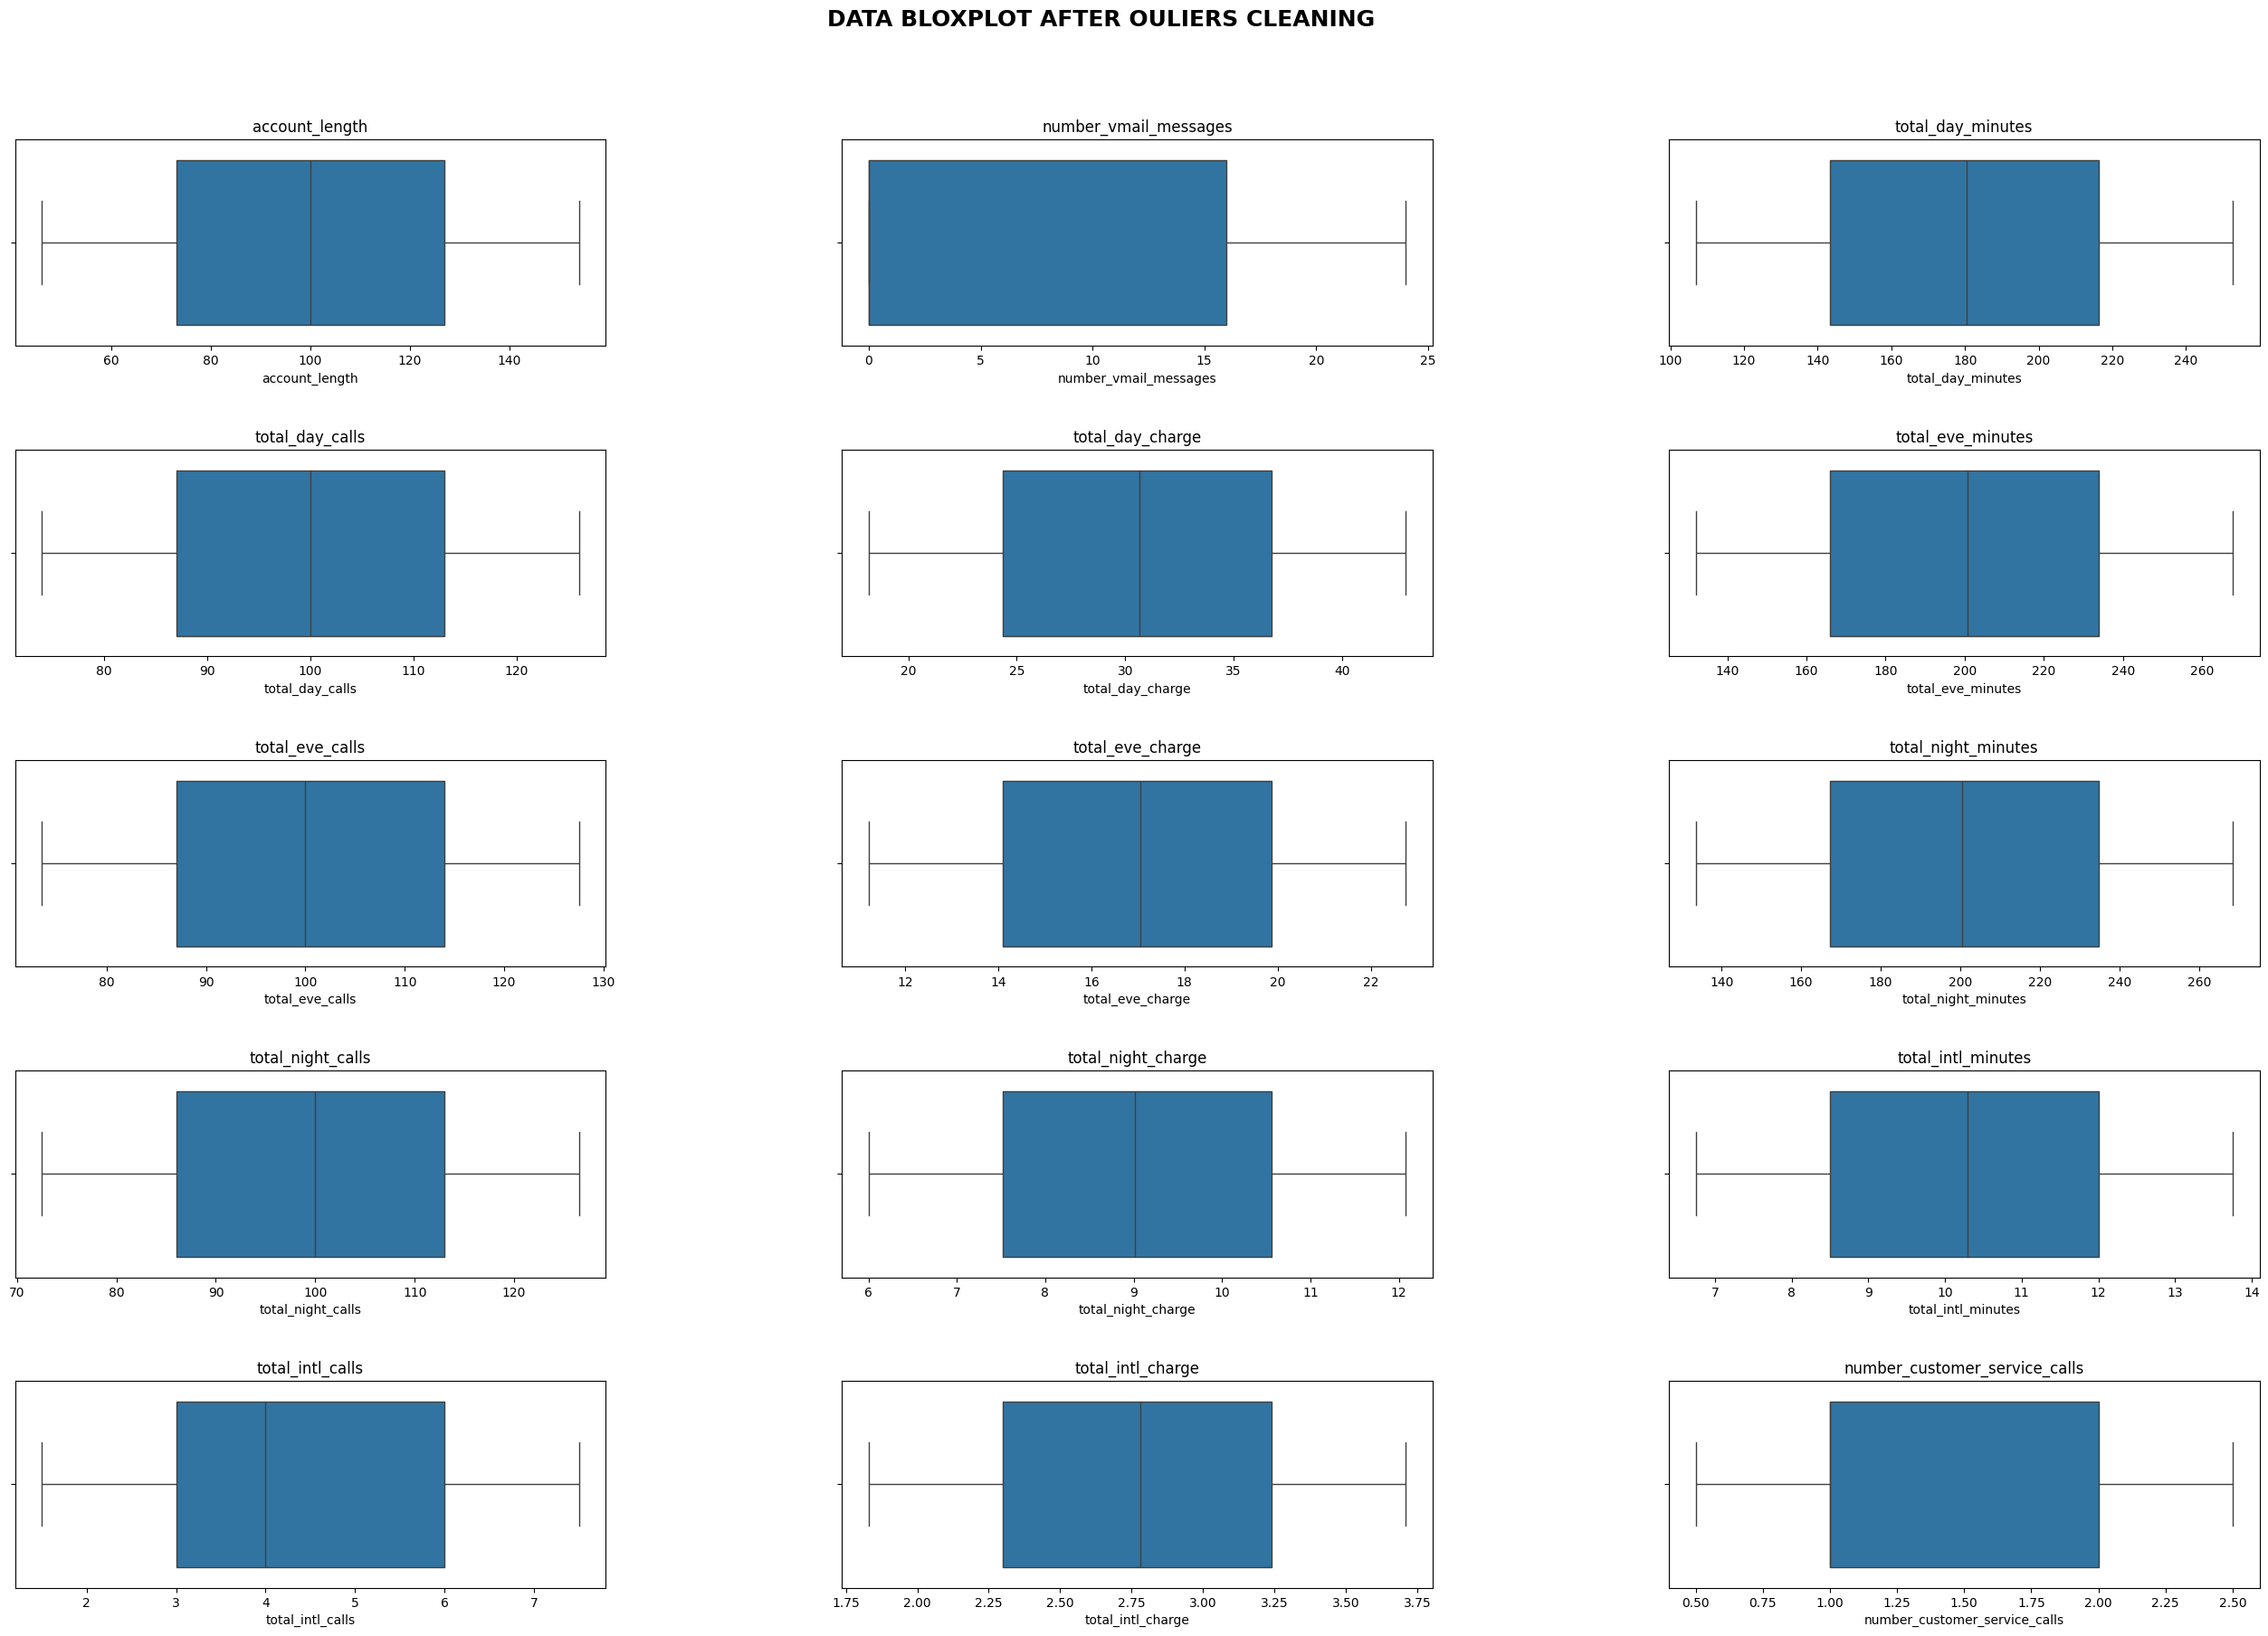

In [ ]:
#Boxplot setelah cleaning outlier
fig = plt.figure(figsize=[32,24])
fig.suptitle('DATA BLOXPLOT AFTER OULIERS CLEANING', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(numeric_col):
    ax1 = fig.add_subplot(6,3, i+1);
    ax1 = sns.boxplot(data = df, x=col);

    ax1.set_title(f'{col}')
    ax1.set_xlabel(f'{col}')

# 3. EDA (Exploraroty Data Analysis)

### a. Measure of Central Tendency

In [ ]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,99.851765,5.970118,180.157165,100.002118,30.626762,200.188988,100.240588,17.015856,200.610509,99.750471,9.027242,10.289788,4.237176,2.779176,1.433765
std,33.725124,10.136294,45.536925,16.431097,7.740140,42.349655,16.794329,3.599128,42.229605,16.965536,1.900659,2.215109,1.864902,0.596478,0.748121
min,46.000000,0.000000,106.887500,74.000000,18.172500,132.000000,73.500000,11.220000,133.487500,72.500000,6.003750,6.750000,1.500000,1.830000,0.500000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,154.000000,24.000000,252.637500,126.000000,42.942500,267.700000,127.500000,22.750000,268.437500,126.500000,12.078750,13.750000,7.500000,3.710000,2.500000


In [ ]:
df.describe(include='all')

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
count,4250,4250.000000,4250,4250,4250,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250
unique,51,NaN,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,area_code_415,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
freq,139,NaN,2108,3854,3138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3652
mean,NaN,99.851765,NaN,NaN,NaN,5.970118,180.157165,100.002118,30.626762,200.188988,100.240588,17.015856,200.610509,99.750471,9.027242,10.289788,4.237176,2.779176,1.433765,NaN
std,NaN,33.725124,NaN,NaN,NaN,10.136294,45.536925,16.431097,7.740140,42.349655,16.794329,3.599128,42.229605,16.965536,1.900659,2.215109,1.864902,0.596478,0.748121,NaN
min,NaN,46.000000,NaN,NaN,NaN,0.000000,106.887500,74.000000,18.172500,132.000000,73.500000,11.220000,133.487500,72.500000,6.003750,6.750000,1.500000,1.830000,0.500000,NaN
25%,NaN,73.000000,NaN,NaN,NaN,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,100.000000,NaN,NaN,NaN,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,NaN,NaN,NaN,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,NaN


### b. Melihat unique value

In [ ]:
df.nunique().sort_values()

churn                               2
international_plan                  2
voice_mail_plan                     2
area_code                           3
number_customer_service_calls       4
total_intl_calls                    8
number_vmail_messages              19
state                              51
total_day_calls                    53
total_eve_calls                    56
total_night_calls                  56
total_intl_minutes                 72
total_intl_charge                  72
account_length                    109
total_night_charge                604
total_eve_charge                 1065
total_night_minutes              1226
total_eve_minutes                1232
total_day_charge                 1285
total_day_minutes                1285
dtype: int64

dari data unique ini dapat kita ketahui bahwa tidak ada inconsistent data, dan tidak ada outliers pada categorical data

In [ ]:
print(df['state'].unique())
print('Total state: ', df['state'].nunique())

['OH' 'NJ' 'OK' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY' 'ID' 'VA'
 'TX' 'FL' 'CO' 'AZ' 'SC' 'WY' 'HI' 'NH' 'AK' 'GA' 'MD' 'AR' 'WI' 'OR'
 'MI' 'DE' 'UT' 'CA' 'SD' 'NC' 'WA' 'MN' 'NM' 'NV' 'DC' 'VT' 'KY' 'ME'
 'MS' 'AL' 'NE' 'KS' 'TN' 'IL' 'PA' 'CT' 'ND']
Total state:  51


In [ ]:
print(df['area_code'].unique())
print('Total area code: ', df['area_code'].value_counts())

['area_code_415' 'area_code_408' 'area_code_510']
Total area code:  area_code_415    2108
area_code_408    1086
area_code_510    1056
Name: area_code, dtype: int64


In [ ]:
print(df['international_plan'].unique())
print(df['international_plan'].value_counts())

['no' 'yes']
no     3854
yes     396
Name: international_plan, dtype: int64


In [ ]:
print(df['voice_mail_plan'].unique())
print(df['voice_mail_plan'].value_counts())

['yes' 'no']
no     3138
yes    1112
Name: voice_mail_plan, dtype: int64


### b. Analisa Multivariat

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   float64
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   float64
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   float64
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   float64
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

<ipython-input-23-d06b98dda78f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


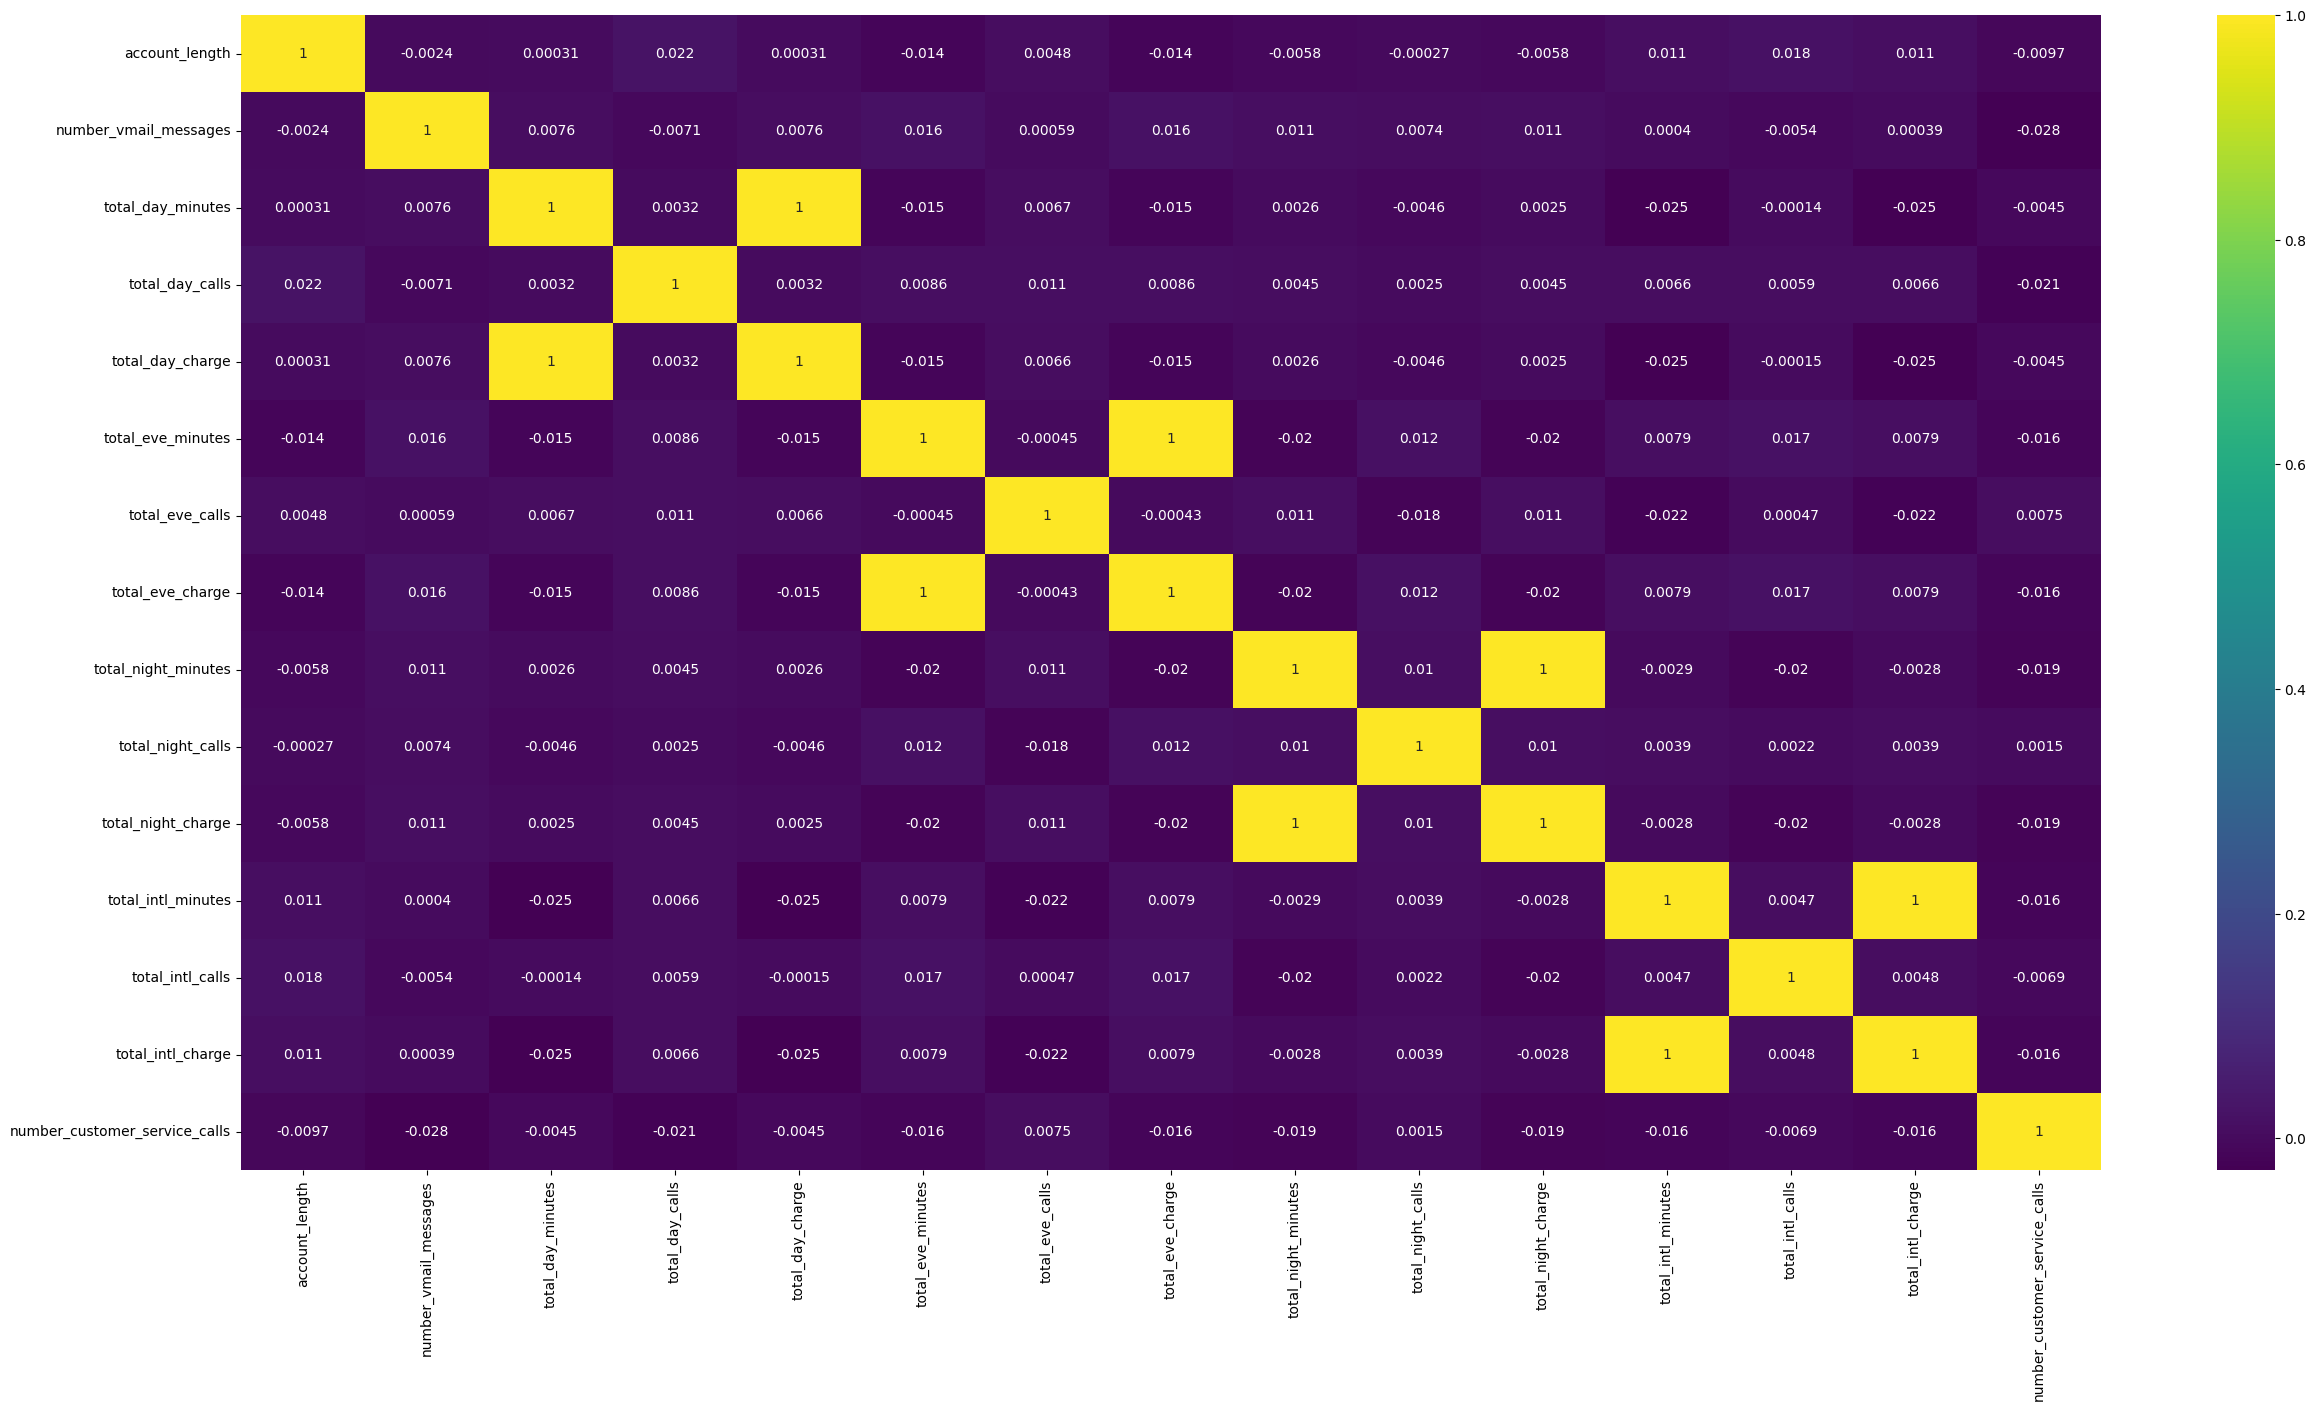

In [ ]:
plt.figure(figsize=(30,15))
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.show()

terdapat multikolinearitas:
- `total_day_minutes` and `total_day_charge`
- `total_eve_minutes` and `total_eve_charge`
- `total_night_minutes` and `total_night_charge`
- `total_intl_minutes` and `total_intl_charge`

kita harus melakukan treatment untuk data ini, jika tidak maka akan mengganggu model regresi yang akan kita gunakan, menyebabkan tidak stabilnya coefficient, overfitting dan bisa mengurangi presisi model


---


salah satu cara untuk mengatasi model ini adalah, dengan melakukan kombinasi variable yang terindikasi multikolinieritas

total_charge = `total_day_charge` + `total_eve_charge` + `total_night_charge`

total_minutes = `total_day_minutes`+`total_eve_minutes`+ `total_night_minutes`


---

atau kita bisa mengeliminasi salah satu variable yang memiliki korelasi tinggi tersebut

ini kita gunakan pada international minutes dan charge, karena dalam data kami mengamati pengaruh international plan terhadap churn maka, kami memberi treatment pada multikolinieritas ini dengan drop `total international minutes`

---

namun dari heatmap ini dapat diketahui bahwa variable lain memiliki korelasi antar variable yang rendah, sehingga kita perlu melakukan penelusuran lebih lanjut menggunakan analisa univariat dan bivariat


**Interpretasi**

dapat dilihat bahwa seluruh bentuk transaksi vmail messages,eve minutes, panggilan malam, dan panggilan international

memiliki korelasi yang sangat kuat dengan data harga per masing-masing panggilan

menunjukkan setiap penambahan lama waktu transaksi maka harga yang dibebankan kepada konsumen akan semakin meningkat

### c. Analisa Univariat

In [ ]:
#Mengelompokkan dataset (kategorikal dan numerikal)
numerical_col = ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes',
               'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes',
               'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']
categorical_col = ['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']

**PERSENTASE CHURN KONSUMEN**

In [ ]:
colors = ['#9370DB', '#FFD700']

<Axes: >

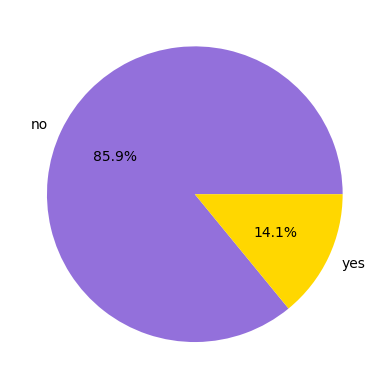

In [ ]:
# Melihat berapa banyak churn dilakukan oleh pelanggan
df.groupby('churn').size().plot(kind='pie', autopct = '%.1f%%', radius=1, colors=colors)

**DEMOGRAFI**

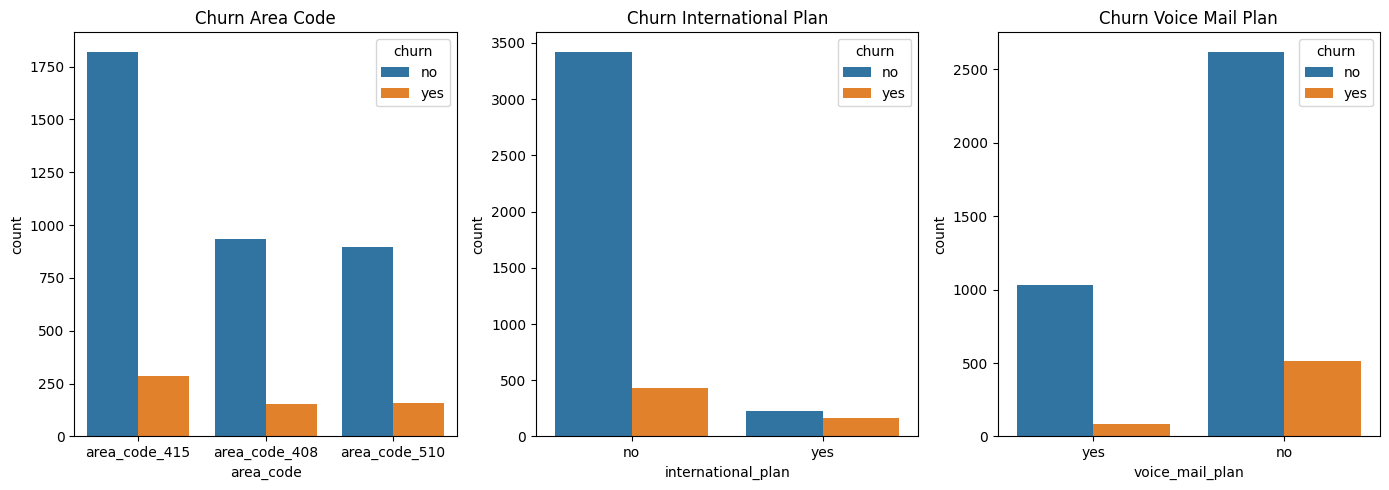

In [ ]:
# area_code, international_plan, voice_mail_plan yang melakukan churn
fig, axs = plt.subplots(1, 3, figsize=(14,5))

# Count plot AREA CODE
sns.countplot(x='area_code', hue='churn', data=df, ax=axs[0])
axs[0].set_title('Churn Area Code')

# Count plot INTERNATIONAL PLAN
sns.countplot(x='international_plan', hue='churn', data=df, ax=axs[1])
axs[1].set_title('Churn International Plan')

# Count plot for VOICE MAIL PLAN
sns.countplot(x='voice_mail_plan', hue='churn', data=df, ax=axs[2])
axs[2].set_title('Churn Voice Mail Plan')

plt.tight_layout()
plt.show()

**Insight :**

Pelanggan paling banyak berasal dari area code 415, diikuti oleh area code 408 dan 510

Mayoritas pelanggan tidak menggunakan layanan international, dan tidak menggunakan voice mail



*   area 415 memiliki tingkat paling tinggi
* pelanggan yang tidak melakukan international plan lebih cenderung mempertahankan untuk berlangganan dibanding pelanggan yang melakukan langganan international (PERLU PENINGKATAN DI INTERNATIONAL PLAN)
* pelanggan yang tidak melakukan langganan voice mail cenderung melakukan churn dibandingkan yang melakukan langganan voice mail (PERLU PROMOSI TENTANG HARGA VOICE MAIL YANG TERJANGKAU, SEHINGGA PELANGGAN YANG BELUM MELAKUKAN LANGGANAN VOICE MAIL DAPAT MERASAKAN LAYANAN INI)



**HUBUNGAN NUMERICAL DATA WITH CHURN**

In [ ]:
categorical_col = ['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']
numeric_col = ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
               'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
               'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes',
               'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']

- total_minutes
- total_calls
-total_charge

tapi keluarin international, dipisah sendiri
- number vmail messages
- number_customer_service_calls

**Features**

In [ ]:
total_durasi= df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes']
total_charge = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']
total_calls = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls']

df['total_durasi'] = total_durasi
df['total_charge'] = total_charge
df['total_calls'] = total_calls

Q1 : Bagaimana pengaruh lama panggilan terhadap harga

A1: Positif Correlation

Text(0, 0.5, 'Price')

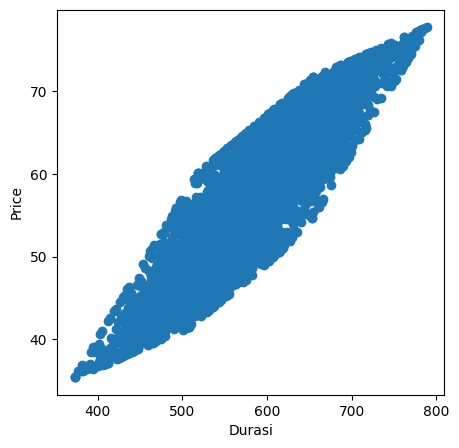

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(x='total_durasi',y='total_charge',data=df)
plt.xlabel('Durasi')
plt.ylabel('Price')

Dapat dilihat bahwa mayoritas dari pelanggan melakukan total durasi panggilan selama 500 hingga kurang lebih 650 menit dan mendapatkan charge sebesar 50 hingga 65. `Total_durasi` dan `Total Charge` memiliki korelasi positif, dimana semakin meningkat total panggilan harga tagihan akan semakin tinggi


---



**Insight**

dapat dilakukan promo panggilan, atau gratis panggilan berdasarkan durasi

<Axes: xlabel='total_durasi', ylabel='Count'>

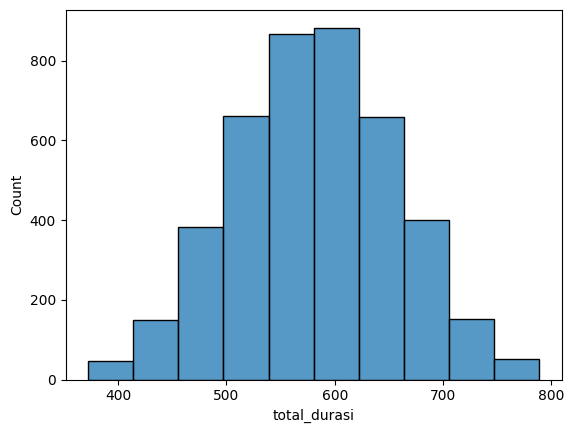

In [ ]:
sns.histplot(df.total_durasi,bins=10)

Q2 : Pengaruh jumlah panggilan terhadap harga

A2 : No Correlation

Text(0, 0.5, 'Price')

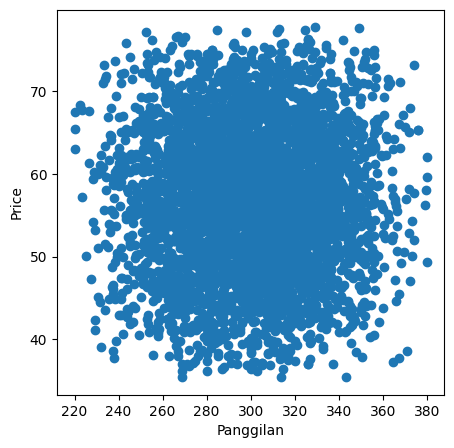

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(x='total_calls',y='total_charge',data=df)
plt.xlabel('Panggilan')
plt.ylabel('Price')

<Axes: xlabel='total_calls', ylabel='Count'>

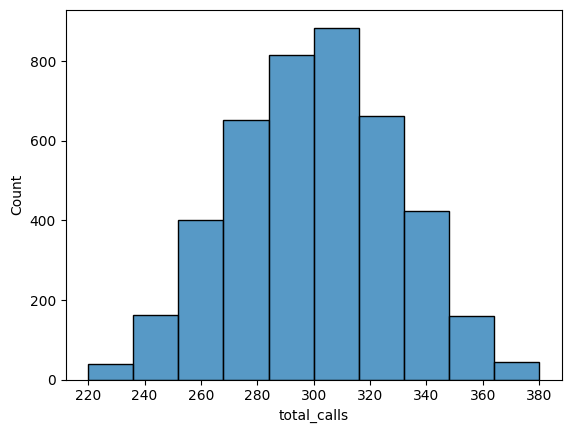

In [ ]:
sns.histplot(df.total_calls,bins=10)

`Total calls` tidak memiliki korelasi terhadap `Total_charge`. Sehingga penentuan total tagihan tidak berdasarkan jumlah panggilan melainkan jumlah durasi, mayoritas pelanggan melakukan panggilan sebanyak kurang lebih 270 hingga 350 setiap periode langganan.

# Data Preprocessing

### Features and Mapping

In [ ]:
df.nunique().sort_values()

international_plan                  2
voice_mail_plan                     2
churn                               2
area_code                           3
number_customer_service_calls       4
total_intl_calls                    8
number_vmail_messages              19
state                              51
total_day_calls                    53
total_eve_calls                    56
total_night_calls                  56
total_intl_charge                  72
total_intl_minutes                 72
account_length                    109
total_calls                       295
total_night_charge                604
total_eve_charge                 1065
total_night_minutes              1226
total_eve_minutes                1232
total_day_charge                 1285
total_day_minutes                1285
total_durasi                     3160
total_charge                     3469
dtype: int64

In [ ]:
# Dropping column yang tidak digunakan
df.drop(columns=['account_length', 'state', 'total_day_minutes', 'total_day_charge', 'total_eve_minutes', 'total_eve_charge', 'total_night_minutes',
                       'total_night_charge', 'total_intl_minutes', 'total_day_calls', 'total_eve_calls', 'total_night_calls', 'total_intl_calls'], inplace=True)

In [ ]:
#Mengganti string 'yes' 'no'menjadi dummy
df['international_plan'] = df['international_plan'].map({'yes': 1, 'no': 0})
df['voice_mail_plan'] = df['voice_mail_plan'].map({'yes': 1, 'no': 0})
df['area_code'] = df['area_code'].map({'area_code_415': 1, 'area_code_408':2, 'area_code_510': 3})
df['churn'] = df['churn'].map({'yes': 1, 'no': 0})

<Axes: >

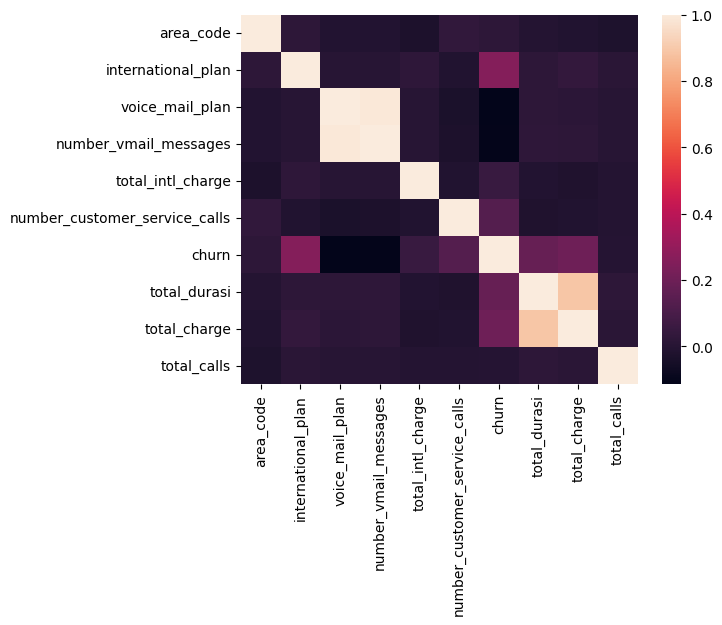

In [ ]:
sns.heatmap(df.corr())

In [ ]:
#Melakukan treatment terhadap multikolinieritas
df.drop(columns=['number_vmail_messages'], inplace=True)

<Axes: >

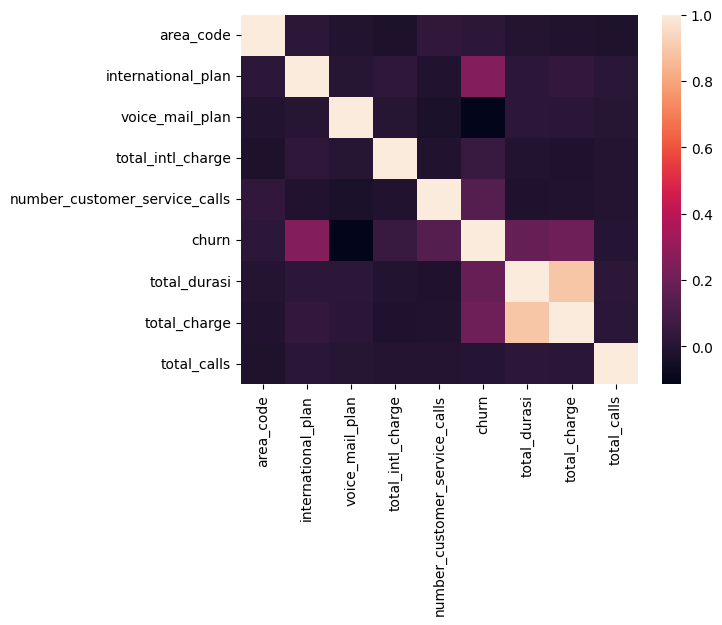

In [ ]:
sns.heatmap(df.corr())

array([[<Axes: title={'center': 'area_code'}>,
        <Axes: title={'center': 'international_plan'}>,
        <Axes: title={'center': 'voice_mail_plan'}>],
       [<Axes: title={'center': 'total_intl_charge'}>,
        <Axes: title={'center': 'number_customer_service_calls'}>,
        <Axes: title={'center': 'churn'}>],
       [<Axes: title={'center': 'total_durasi'}>,
        <Axes: title={'center': 'total_charge'}>,
        <Axes: title={'center': 'total_calls'}>]], dtype=object)

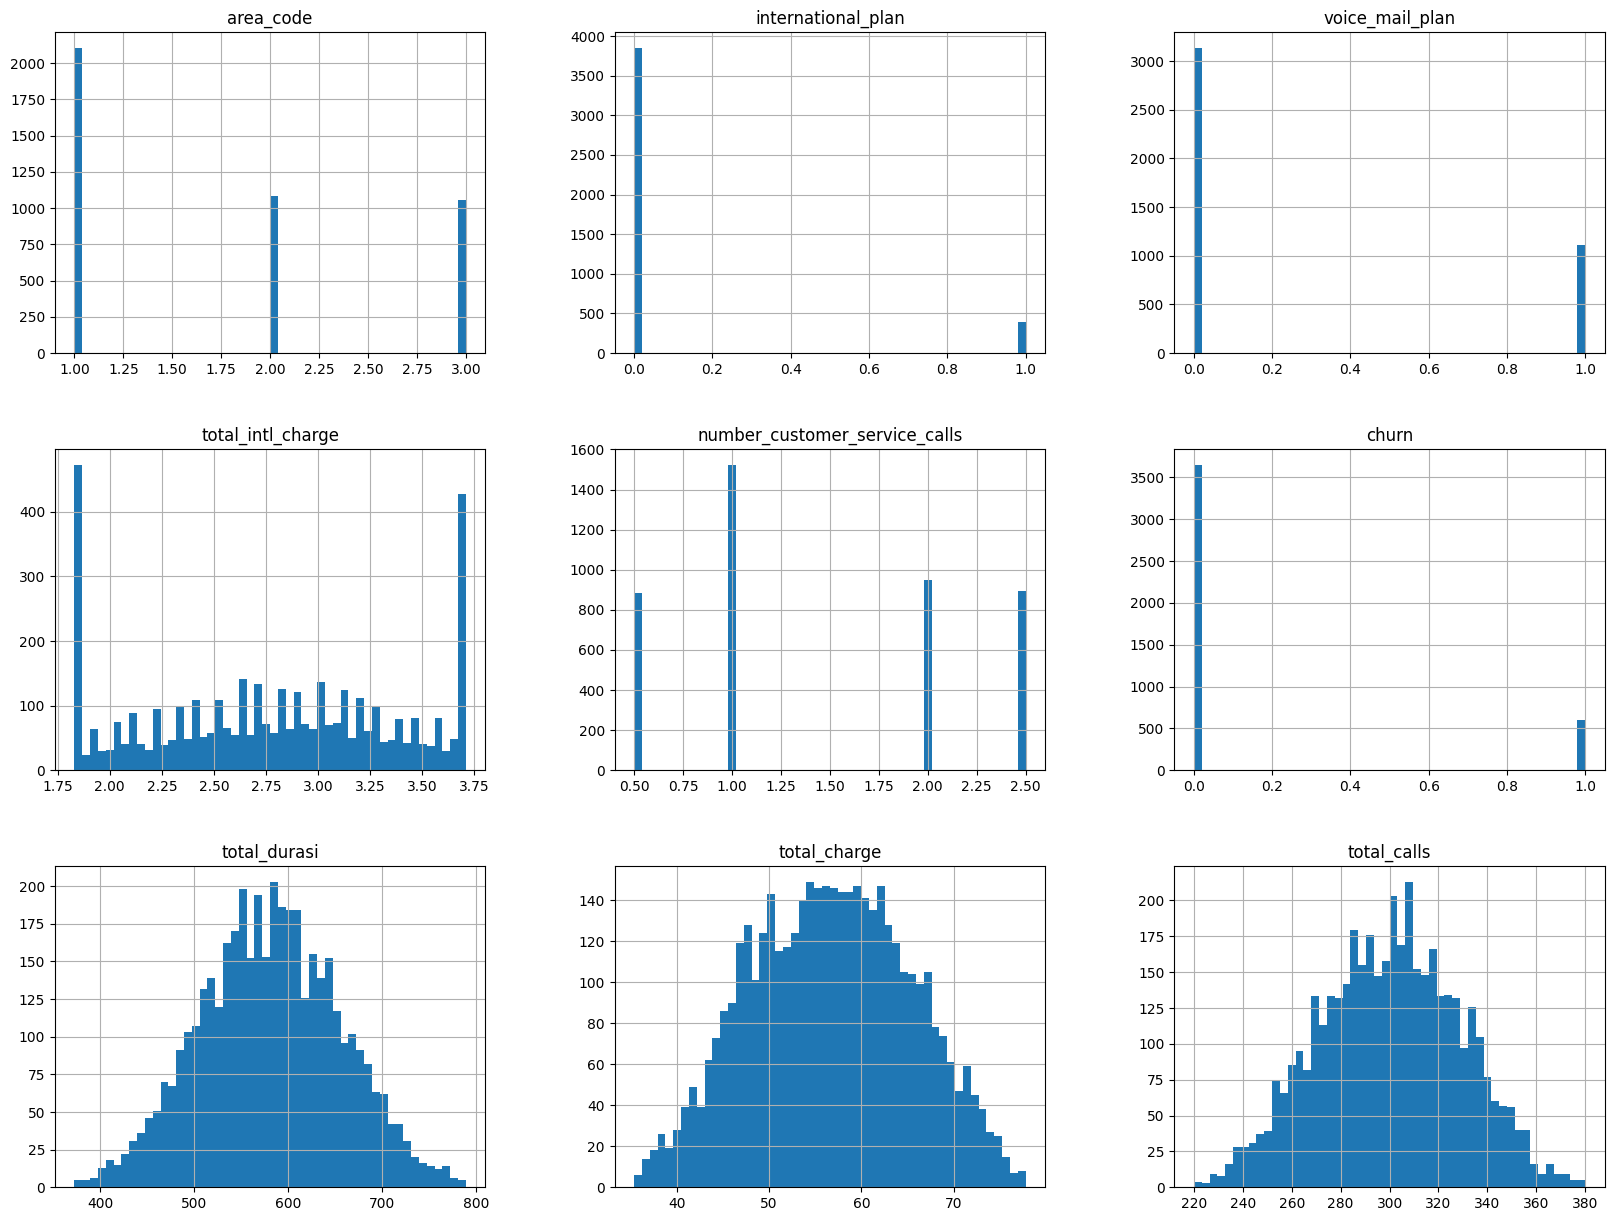

In [ ]:
df.hist(bins=50, figsize=(20,15))

# Data Modeling

In [ ]:
#Drop Target Variable
X = df.drop('churn' , 1 )
y = df['churn']

<ipython-input-41-00c1bcb00c9a>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('churn' , 1 )


In [ ]:
#Train-test Split
#Kami menggunakan test size 20%, dan random_state pada d123
# Split data ke training(80%) dan testing(2%).
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state =0)

## Model yang kami gunakan:

- Logistic Regression
- K Nearest Neighbors
- Decission Tree
-Random Forest


**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### Logistic Regression

In [ ]:
#Feature Scaling
from sklearn.linear_model import LogisticRegression

#Fitting Logistic Regression di Training Set
logreg = LogisticRegression(random_state = 0)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
#Predicting Test Result
y_pred = logreg.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# Evaluasi Model
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       735
           1       0.62      0.13      0.22       115

    accuracy                           0.87       850
   macro avg       0.75      0.56      0.57       850
weighted avg       0.84      0.87      0.83       850



In [ ]:
# Evaluating Model
from sklearn.metrics import confusion_matrix
conmat = confusion_matrix(y_test, y_pred)
conmat

array([[726,   9],
       [100,  15]])

In [ ]:
#Accuracy dan Missclassification Rate
accuracy1 = (726 + 15) / 100
print('Accuracy rate dari model Logistic Regression adalah: ' + str(accuracy1))
missclass1 = (9 + 100) / 100
print('Missclassification rate dari model Logistic Regression adalah: ' + str(missclass1))

Accuracy rate dari model Logistic Regression adalah: 7.41
Missclassification rate dari model Logistic Regression adalah: 1.09


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Predict Model
predictions_tree = dtc.predict(X_test)
predictions_tree

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# Evaluasi Model
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions_tree))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       735
           1       0.52      0.60      0.56       115

    accuracy                           0.87       850
   macro avg       0.73      0.76      0.74       850
weighted avg       0.88      0.87      0.88       850



In [ ]:
print(confusion_matrix(y_test, predictions_tree))

[[672  63]
 [ 46  69]]


In [ ]:
#Accuracy dan Missclassification Rate
accuracy2 = (675 + 69) / 100
print('Accuracy rate dari model Decisions Tree adalah: ' + str(accuracy2))
missclass2 = (60 + 46) / 100
print('Missclassification rate dari model Decisions Tree adalah: ' + str(missclass2))

Accuracy rate dari model Decisions Tree adalah: 7.44
Missclassification rate dari model Decisions Tree adalah: 1.06


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier(n_estimators=100)
rforest.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rforest_pred = rforest.predict(X_test)

In [ ]:
print(classification_report(y_test, rforest_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       735
           1       0.84      0.57      0.68       115

    accuracy                           0.93       850
   macro avg       0.89      0.78      0.82       850
weighted avg       0.92      0.93      0.92       850



In [ ]:
print(confusion_matrix(y_test, rforest_pred))

[[722  13]
 [ 49  66]]


In [ ]:
#Accuracy dan Missclassification Rate
accuracy3 = (722 + 68) / 100
print('Accuracy rate dari model Random Forest adalah: ' + str(accuracy3))
missclass3 = (13 + 47) / 100
print('Missclassification rate dari model Random Forest adalah: ' + str(missclass3))

Accuracy rate dari model Random Forest adalah: 7.9
Missclassification rate dari model Random Forest adalah: 0.6


### KNN

In [ ]:
#Fit KNN di Train set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
#Predict test
knn_predict = classifier.predict(X_test)

In [ ]:
# Evaluasi Model
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, knn_predict))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       735
           1       0.71      0.45      0.55       115

    accuracy                           0.90       850
   macro avg       0.82      0.71      0.75       850
weighted avg       0.89      0.90      0.89       850



In [ ]:
#Evaluasi Model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, knn_predict)
cm

array([[714,  21],
       [ 63,  52]])

In [ ]:
#Accuracy dan Missclassification Rate
accuracy4 = (714 + 52) / 100
print('Accuracy rate dari model KNN adalah: ' + str(accuracy4))
missclass4 = (21 + 63) / 100
print('Missclassification rate dari model KNN adalah: ' + str(missclass4))

Accuracy rate dari model KNN adalah: 7.66
Missclassification rate dari model KNN adalah: 0.84


### **KESIMPULAN**
**Random Forest memiliki accuracy paling tinggi**

In [ ]:
print('----Logistic Regression----')
print('Accuracy rate dari model Logistic Regression adalah: ' + str(accuracy1))
print('Missclassification rate dari model Logistic Regression adalah: ' + str(missclass1))
print('----Decisions Tree----')
print('Accuracy rate dari model Decisions Tree adalah: ' + str(accuracy2))
print('Missclassification rate dari model Decisions Tree adalah: ' + str(missclass2))
print('----Random Forest----')
print('Accuracy rate dari model Random Forest adalah: ' + str(accuracy3))
print('Missclassification rate dari model Random Forest adalah: ' + str(missclass3))
print('----KNN----')
print('Accuracy rate dari model KNN adalah: ' + str(accuracy4))
print('Missclassification rate dari model KNN adalah: ' + str(missclass4))

----Logistic Regression----
Accuracy rate dari model Logistic Regression adalah: 7.41
Missclassification rate dari model Logistic Regression adalah: 1.09
----Decisions Tree----
Accuracy rate dari model Decisions Tree adalah: 7.44
Missclassification rate dari model Decisions Tree adalah: 1.06
----Random Forest----
Accuracy rate dari model Random Forest adalah: 7.9
Missclassification rate dari model Random Forest adalah: 0.6
----KNN----
Accuracy rate dari model KNN adalah: 7.66
Missclassification rate dari model KNN adalah: 0.84


# Penyimpanan Model

In [ ]:
import pickle
rforest = RandomForestClassifier(n_estimators=100)
rforest = rforest.fit(X_train, y_train)
pickle.dump(rforest, open('forest.pkl', 'wb'))

## PEMAKAIAN PADA DATA TEST

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Data Test (3).csv to Data Test (3).csv


In [ ]:
df = pd.read_csv('/content/Data Test (3).csv')

In [ ]:
df.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [ ]:
#Membuat fungsi preprocessing untuk label encoding data yang baru masuk
def Preprocess(data):
   # Assign new variable
   total_durasi= df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes']
   total_charge = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']
   total_calls = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls']

   df['total_durasi'] = total_durasi
   df['total_charge'] = total_charge
   df['total_calls'] = total_calls
   #Mengganti string 'yes' 'no'menjadi dummy
   df['international_plan'] = df['international_plan'].map({'yes': 1, 'no': 0})
   df['voice_mail_plan'] = df['voice_mail_plan'].map({'yes': 1, 'no': 0})
   df['area_code'] = df['area_code'].map({'area_code_415': 1, 'area_code_408':2, 'area_code_510': 3})
   # Dropping column yang tidak digunakan
   df.drop(columns=['account_length', 'state', 'total_day_minutes', 'total_day_charge', 'total_eve_minutes', 'total_eve_charge', 'total_night_minutes',
                       'total_night_charge', 'total_intl_minutes', 'total_day_calls', 'total_eve_calls', 'total_night_calls', 'total_intl_calls'], inplace=True)
   #Melakukan treatment terhadap multikolinieritas
   df.drop(columns=['number_vmail_messages'], inplace=True)
   #Variable X
   X = ['area_code', 'international_plan', 'voice_mail_plan', 'total_intl_charge', 'number_customer_service_calls','total_durasi','total_charge','total_calls']
   return data[X]

In [ ]:
df_test = Preprocess(df)
df_test

,area_code,international_plan,voice_mail_plan,total_intl_charge,number_customer_service_calls,total_durasi,total_charge,total_calls
0,1,0,1,2.70,1,707.2,72.86,300
1,3,1,0,1.70,0,647.9,65.91,317
2,1,0,0,3.54,4,630.9,55.77,245
3,3,0,0,2.19,3,538.5,56.80,346
4,1,0,0,4.19,3,652.1,55.96,303
...,...,...,...,...,...,...,...,...
745,1,0,0,3.05,0,548.4,48.66,307
746,2,0,0,3.32,3,689.5,63.99,314
747,1,0,0,3.97,3,654.6,62.75,276
748,1,0,0,3.67,1,525.8,48.15,314


In [ ]:
#Memanggil Model dan melakukan prediksi
rforest_model = pickle.load(open('/content/forest.pkl', 'rb'))

r_forest_test_predictions = rforest_model.predict(df_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
print("Predictions:")
print(r_forest_test_predictions)

Predictions:
[0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0
 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 0 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0
 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0
 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1
 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 1
 1 0 0 1 1 0 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1
 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0
 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1
 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1
 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1
 0 1 1 1 1 0

In [ ]:
import pandas as pd

# Convert predictions to a DataFrame
predictions_df = pd.DataFrame(r_forest_test_predictions, columns=['Predictions'])

# Display the DataFrame
print("Predictions DataFrame:")
print(predictions_df)

Predictions DataFrame:
     Predictions
0              0
1              1
2              1
3              1
4              1
..           ...
745            1
746            1
747            1
748            1
749            1

[750 rows x 1 columns]


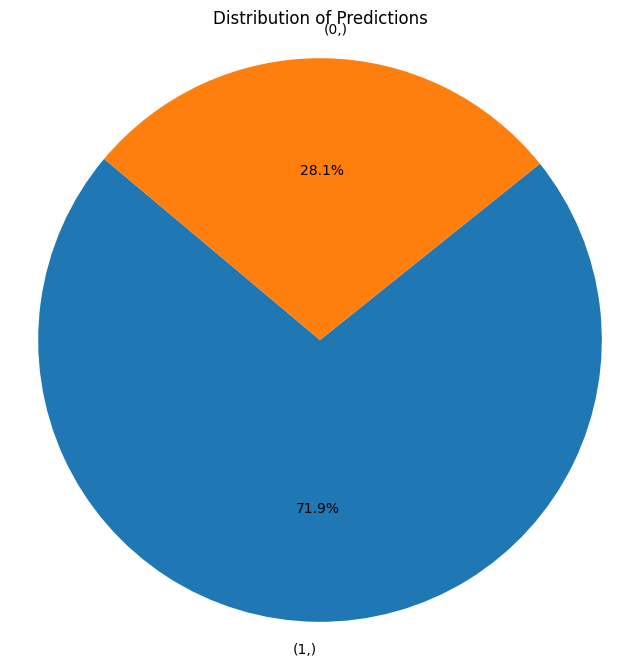

In [ ]:
import matplotlib.pyplot as plt

# Calculate the distribution of predictions
prediction_distribution = predictions_df.value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(prediction_distribution, labels=prediction_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Predictions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [ ]:
prediction_distribution = predictions_df.value_counts()
prediction_distribution

Predictions
1              539
0              211
dtype: int64